<a href="https://colab.research.google.com/github/Mohican999370/Reverie/blob/master/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fashion Mnist dataset, which has 10,000 test data and 60,000 traing data of 9 category of accessories. the algorithum need to identify it.



In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer

from tensorflow.keras.layers import Dense, Activation
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy,CategoricalCrossentropy


In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data, train_labels),(test_data,test_labels)= fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
train_labels[0]

9

In [ ]:
# looking into the input shape
train_data[0].shape # we notice the input shape is integers

(28, 28)

In [ ]:
# since both input and output needed to be preprocesssed.
# normalizing with dividing the numbers with 255, will normalize or put all the values into 0-1 range.

train_data.min(), train_data.max()

# or you can use make_column_transformer to scale and one hot encode.
mk = make_column_transformer(
    (StandardScaler(), ["train_data", "test_data"]),
    (OneHotEncoder(), ['train_labels', "test_labels"])
)

In [ ]:
train_data = tf.cast(train_data , dtype=tf.float32)
test_labels_ht = tf.one_hot(test_labels, depth = 10)
train_labels_ht = tf.one_hot(train_labels, depth = 10)
test_data = tf.cast(test_data,dtype =tf.float32)

In [ ]:
train_data.dtype

tf.float32

In [ ]:
train_labels_ht[0] # changed the dtype and perform one hot encoding for categorical variable

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)>

In [ ]:
# perform normalization on the training data
train_data_norm = (train_data/255)
train_data_norm[:10]

<tf.Tensor: shape=(10, 28, 28), dtype=float32, numpy=
array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.  

In [ ]:
test_data_norm = (test_data/255) # test data has been changed to float from int
# otherwise use as float)

In [ ]:
class_name =  ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#train_labels[43168], class_name[43168] # since performing hot one encoding on the train_labels, i cannot use it as the index for class name
#to obtain title.

21516
10548
3480
9879


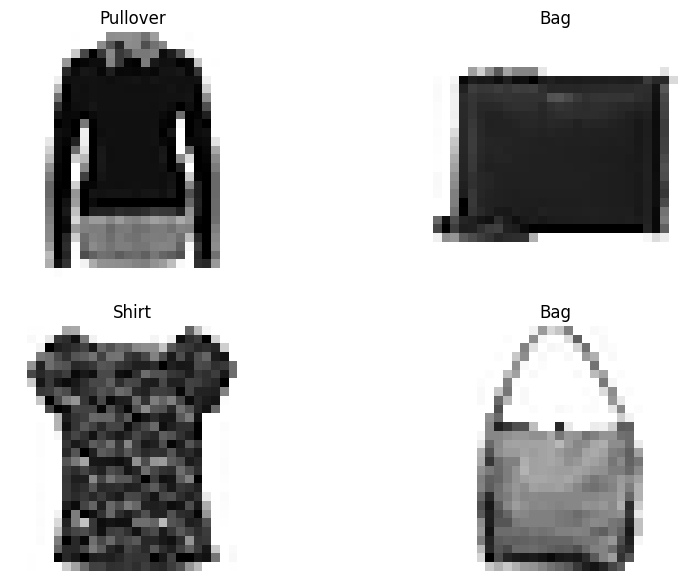

In [ ]:
#### ploting the data
#def plt_choice(train_data):\
import random
tf.random.set_seed(42)
plt.figure(figsize =(10,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  num = random.choice(range(len(train_data)))
  print(num)
  plt.imshow(train_data[num],cmap = plt.cm.binary)
  plt.title(class_name[train_labels[num]])
  #since performing hot one encoding on the train_labels, i cannot use it as the index for class name
#to obtain title. # create another name when you perform normalization or scaling.
  plt.axis(False);

In [ ]:
#### creating the model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28), name = "input_layer1"),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
], name ="model_1")

model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate =0.001),
loss = tf.keras.losses.CategoricalCrossentropy(),
metrics =['accuracy'])

history_1 = model_1.fit(train_data_norm, train_labels_ht, epochs = 100, verbose =1)

Epoch 1/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2285 - accuracy: 0.5403
Epoch 2/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7873 - accuracy: 0.7082
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6942 - accuracy: 0.7488
Epoch 4/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6644 - accuracy: 0.7608
Epoch 5/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6477 - accuracy: 0.7678
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6351 - accuracy: 0.7730
Epoch 7/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6280 - accuracy: 0.7772
Epoch 8/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6210 - accuracy: 0.7799
Epoch 9/100
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6142 - accuracy: 0.7833
Epoch 10/100
1875/1875 [==============================] - 4s 2ms/step - l

Text(0, 0.5, 'losses')

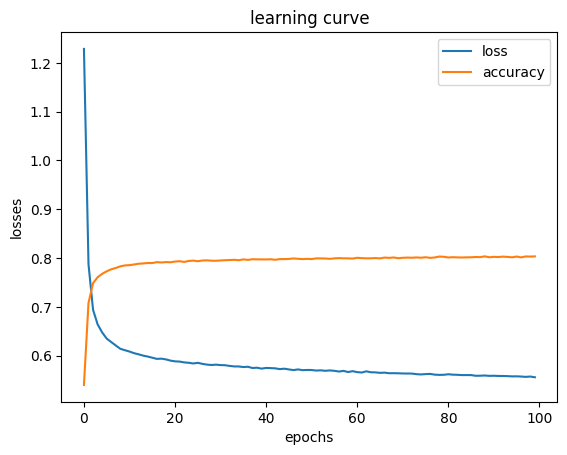

In [ ]:
pd.DataFrame(history_1.history).plot(title = "learning curve")
plt.xlabel('epochs')
plt.ylabel('losses')
# steps used to improve the model
# perform preprocessing in the seprate data, otherwisenormal data and one hot encoded data can shape issues while learning.
# use call back to obatin the best learning rate with epochs.

In [ ]:
model_1.evaluate(test_data_norm, test_labels_ht)
# this models performance is betetr after working on seprate data from make column transfer data
# accuracy of the model after 200 iterations have improved to 80%



313/313 [==============================] - 1s 2ms/step - loss: 0.6191 - accuracy: 0.7869


[0.6190819144248962, 0.786899983882904]

In [ ]:
model_1.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer1 (Flatten)      (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Model_2 using callback to improve the learning rate

In [ ]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(5, activation ='relu'),
    tf.keras.layers.Dense(5, activation ='relu'),
    tf.keras.layers.Dense(5, activation ='relu'),
    tf.keras.layers.Dense(10, activation ='softmax'),
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * (10**(epoch/20)))

model_2.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = tf.keras.losses.CategoricalCrossentropy(),
                metrics =['accuracy'])

history_2 = model_2.fit(train_data_norm,
                        train_labels_ht,
                        epochs = 200,
                        callbacks =[lr_schedule],
                        validation_data =(test_data_norm,test_labels_ht)
                        ,verbose =1) # sparse when one hot encoding has not been done and in this case use one hot data, without using sparse






Epoch 1/200
1875/1875 [==============================] - 14s 6ms/step - loss: 1.1300 - accuracy: 0.5545 - val_loss: 0.7834 - val_accuracy: 0.6902 - lr: 0.0010
Epoch 2/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6840 - accuracy: 0.7505 - val_loss: 0.6547 - val_accuracy: 0.7600 - lr: 0.0011
Epoch 3/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6166 - accuracy: 0.7756 - val_loss: 0.6327 - val_accuracy: 0.7729 - lr: 0.0013
Epoch 4/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5907 - accuracy: 0.7859 - val_loss: 0.6096 - val_accuracy: 0.7846 - lr: 0.0014
Epoch 5/200
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5771 - accuracy: 0.7965 - val_loss: 0.6000 - val_accuracy: 0.7835 - lr: 0.0016
Epoch 6/200
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5642 - accuracy: 0.8030 - val_loss: 0.6238 - val_accuracy: 0.7824 - lr: 0.0018
Epoch 7/200
1875/1875 [============================

In [ ]:
# understand history
pd.DataFrame(history_2.history).describe()

,loss,accuracy,val_loss,val_accuracy,lr
count,2.000000e+02,200.000000,2.000000e+02,200.000000,2.000000e+02
mean,2.593065e+05,0.226289,2.387411e+05,0.222408,4.097741e+05
std,8.448191e+05,0.258261,7.671840e+05,0.254024,1.331166e+06
min,5.318445e-01,0.096883,5.495196e-01,0.100000,1.000000e-03
25%,2.340715e+00,0.099392,2.347708e+00,0.100000,3.076304e-01
50%,5.181914e+01,0.100417,4.769625e+01,0.100000,9.456255e+01
75%,1.823578e+04,0.101796,1.701432e+04,0.100000,2.904357e+04
max,5.711068e+06,0.814550,4.566276e+06,0.810000,8.912509e+06


Text(0, 0.5, 'Loss')

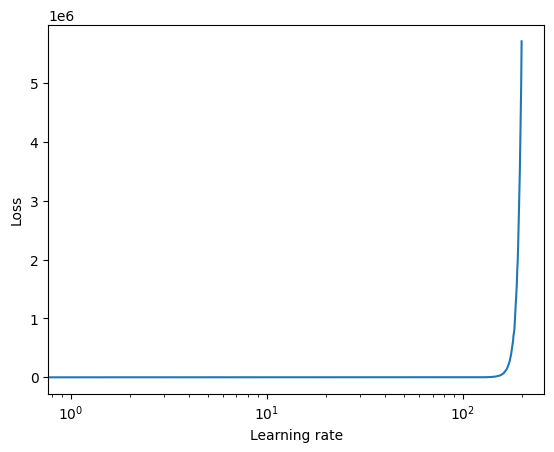

In [ ]:
# plot the learning rate curve with validato nad test data
lr = 1e-3*(10**(np.arange(200)/20))
plt.semilogx(history_2.history['loss'])
plt.xlabel("Learning rate")
plt.ylabel("Loss")